In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import tqdm

%matplotlib inline

In [0]:
transform = transforms.Compose(
    [transforms.CenterCrop((28,28)),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# transform = transforms.Compose(
#     [transforms.ToTensor(),transforms.CenterCrop(28,28)])

In [3]:
cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

0it [00:00, ?it/s]

 99%|█████████▉| 168861696/170498071 [00:19<00:00, 12325165.43it/s]

Files already downloaded and verified


# Training set with Random Labels

In [4]:
cifar_trainset_random = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

cifar_trainset_random.targets[:50000] = np.random.randint(low=0,high=9,size=50000)

Files already downloaded and verified


In [5]:
np.unique(cifar_trainset.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=256,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=256,
                                         shuffle=False, num_workers=2)

In [0]:
trainloader_random = torch.utils.data.DataLoader(cifar_trainset_random,batch_size=256,shuffle=True,num_workers=2)

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()


In [0]:
dataiter_random = iter(trainloader_random)
images_random, labels_random = dataiter_random.next()


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

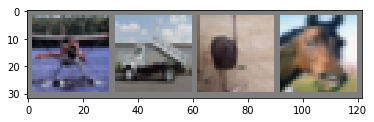

GroundTruth:  plane truck  bird horse


In [12]:
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

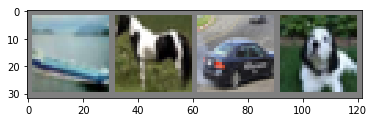

GroundTruth:   frog   cat  frog horse


In [13]:
imshow(torchvision.utils.make_grid(images_random[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels_random[j]] for j in range(4)))

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*28*28,512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,512)
        self.fc4 = nn.Linear(512,10)
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #x = x - x.mean(dim=(0,2),keepdim=True)/x.std(dim=(0,2),keepdim=True)
        
        x = (x.view(-1,3*28*28))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        return x


net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.284
[1,   100] loss: 2.158
[1,   150] loss: 1.990
[2,    50] loss: 1.796
[2,   100] loss: 1.739
[2,   150] loss: 1.675
[3,    50] loss: 1.590
[3,   100] loss: 1.539
[3,   150] loss: 1.549
[4,    50] loss: 1.463
[4,   100] loss: 1.447
[4,   150] loss: 1.434
[5,    50] loss: 1.379
[5,   100] loss: 1.362
[5,   150] loss: 1.334
[6,    50] loss: 1.294
[6,   100] loss: 1.315
[6,   150] loss: 1.292
[7,    50] loss: 1.233
[7,   100] loss: 1.227
[7,   150] loss: 1.255
[8,    50] loss: 1.166
[8,   100] loss: 1.173
[8,   150] loss: 1.185
[9,    50] loss: 1.100
[9,   100] loss: 1.133
[9,   150] loss: 1.128
[10,    50] loss: 1.063
[10,   100] loss: 1.062
[10,   150] loss: 1.076
[11,    50] loss: 1.009
[11,   100] loss: 1.035
[11,   150] loss: 1.020
[12,    50] loss: 0.960
[12,   100] loss: 0.979
[12,   150] loss: 0.970
[13,    50] loss: 0.916
[13,   100] loss: 0.935
[13,   150] loss: 0.939
[14,    50] loss: 0.849
[14,   100] loss: 0.860
[14,   150] loss: 0.883
[15,    50] loss: 0

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 100 %


In [0]:
total,correct

(50000, 50000)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [0]:
dataiter = iter(testloader)

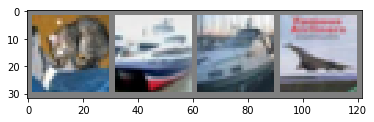

GroundTruth:    cat  ship  ship plane


In [0]:
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Training with Random Labels

In [0]:
net_random_labels = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_random_labels.parameters(), lr=0.01, momentum=0.9)

In [0]:
for epoch in range(300):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader_random, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_random_labels(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.277
[1,   100] loss: 2.229
[1,   150] loss: 2.209
[2,    50] loss: 2.200
[2,   100] loss: 2.201
[2,   150] loss: 2.201
[3,    50] loss: 2.199
[3,   100] loss: 2.198
[3,   150] loss: 2.199
[4,    50] loss: 2.197
[4,   100] loss: 2.198
[4,   150] loss: 2.198
[5,    50] loss: 2.196
[5,   100] loss: 2.196
[5,   150] loss: 2.196
[6,    50] loss: 2.195
[6,   100] loss: 2.194
[6,   150] loss: 2.196
[7,    50] loss: 2.193
[7,   100] loss: 2.194
[7,   150] loss: 2.193
[8,    50] loss: 2.191
[8,   100] loss: 2.191
[8,   150] loss: 2.191
[9,    50] loss: 2.188
[9,   100] loss: 2.190
[9,   150] loss: 2.189
[10,    50] loss: 2.187
[10,   100] loss: 2.188
[10,   150] loss: 2.188
[11,    50] loss: 2.183
[11,   100] loss: 2.183
[11,   150] loss: 2.183
[12,    50] loss: 2.177
[12,   100] loss: 2.180
[12,   150] loss: 2.179
[13,    50] loss: 2.173
[13,   100] loss: 2.173
[13,   150] loss: 2.174
[14,    50] loss: 2.165
[14,   100] loss: 2.166
[14,   150] loss: 2.169
[15,    50] loss: 2

[114,   150] loss: 0.059
[115,    50] loss: 0.065
[115,   100] loss: 0.078
[115,   150] loss: 0.080
[116,    50] loss: 0.104
[116,   100] loss: 0.077
[116,   150] loss: 0.108
[117,    50] loss: 0.106
[117,   100] loss: 0.110
[117,   150] loss: 0.094
[118,    50] loss: 0.116
[118,   100] loss: 0.115
[118,   150] loss: 0.109
[119,    50] loss: 0.107
[119,   100] loss: 0.083
[119,   150] loss: 0.077
[120,    50] loss: 0.061
[120,   100] loss: 0.060
[120,   150] loss: 0.055
[121,    50] loss: 0.031
[121,   100] loss: 0.023
[121,   150] loss: 0.019
[122,    50] loss: 0.020
[122,   100] loss: 0.013
[122,   150] loss: 0.013
[123,    50] loss: 0.008
[123,   100] loss: 0.011
[123,   150] loss: 0.009
[124,    50] loss: 0.004
[124,   100] loss: 0.003
[124,   150] loss: 0.006
[125,    50] loss: 0.004
[125,   100] loss: 0.005
[125,   150] loss: 0.005
[126,    50] loss: 0.005
[126,   100] loss: 0.006
[126,   150] loss: 0.003
[127,    50] loss: 0.002
[127,   100] loss: 0.002
[127,   150] loss: 0.005


[224,    50] loss: 0.000
[224,   100] loss: 0.000
[224,   150] loss: 0.000
[225,    50] loss: 0.000
[225,   100] loss: 0.000
[225,   150] loss: 0.000
[226,    50] loss: 0.000
[226,   100] loss: 0.000
[226,   150] loss: 0.000
[227,    50] loss: 0.000
[227,   100] loss: 0.000
[227,   150] loss: 0.000
[228,    50] loss: 0.000
[228,   100] loss: 0.000
[228,   150] loss: 0.000
[229,    50] loss: 0.000
[229,   100] loss: 0.000
[229,   150] loss: 0.000
[230,    50] loss: 0.000
[230,   100] loss: 0.000
[230,   150] loss: 0.000
[231,    50] loss: 0.000
[231,   100] loss: 0.000
[231,   150] loss: 0.000
[232,    50] loss: 0.000
[232,   100] loss: 0.000
[232,   150] loss: 0.000
[233,    50] loss: 0.000
[233,   100] loss: 0.000
[233,   150] loss: 0.000
[234,    50] loss: 0.000
[234,   100] loss: 0.000
[234,   150] loss: 0.000
[235,    50] loss: 0.000
[235,   100] loss: 0.000
[235,   150] loss: 0.000
[236,    50] loss: 0.000
[236,   100] loss: 0.000
[236,   150] loss: 0.000
[237,    50] loss: 0.000


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader_random:
        images, labels = data
        outputs = net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 100 %


In [0]:
total,correct

(50000, 50000)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %


In [0]:
dataiter = iter(testloader)

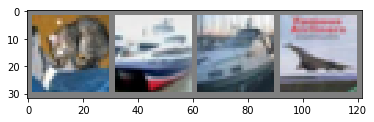

GroundTruth:    cat  ship  ship plane


In [0]:
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Conv Module

In [0]:
class Conv_module(nn.Module):
    def __init__(self,inp_ch,f,s,k,pad):
        super(Conv_module,self).__init__()
        self.inp_ch = inp_ch
        self.f = f
        self.s = s 
        self.k = k 
        self.pad = pad
        
        
        self.conv = nn.Conv2d(self.inp_ch,self.f,k,stride=s,padding=self.pad)
        self.bn = nn.BatchNorm2d(self.f)
        self.act = nn.ReLU()
    def forward(self,x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

In [0]:
conv = Conv_module(3,64,1,3,1)
conv.forward(images).shape

torch.Size([256, 64, 28, 28])

# Inception module

In [0]:
class inception_module(nn.Module):
    def __init__(self,inp_ch,f0,f1):
        super(inception_module, self).__init__()
        self.inp_ch = inp_ch
        self.f0 = f0
        self.f1 = f1
        
        
        
        self.conv1 = Conv_module(self.inp_ch,self.f0,1,1,pad=0)
        self.conv3 = Conv_module(self.inp_ch,self.f1,1,3,pad=1)
        #self.conv1 = nn.Conv2d(3,self.f0,1)
        #self.conv3 = nn.Conv2d(3,self.f1,3,padding=1)
    def forward(self,x):
        x1 = self.conv1.forward(x)
        x3 = self.conv3.forward(x)
        #print(x1.shape,x3.shape)
        
        x = torch.cat((x1,x3),dim=1)
        
    
        return x

In [0]:
inc_module = inception_module(96,32,32)
conv_module = Conv_module(3,96,1,1,0)

In [0]:
img = conv_module(images)
print(img.shape)
inc_module.forward(img).shape

torch.Size([256, 96, 28, 28])


torch.Size([256, 64, 28, 28])

# Downsample module

In [0]:
class downsample_module(nn.Module):
    def __init__(self,inp_ch,f):
        super(downsample_module,self).__init__()
        self.inp_ch = inp_ch
        self.f = f
        self.conv = Conv_module(self.inp_ch,self.f,2,3,pad=0)
        self.pool = nn.MaxPool2d(3,stride=2,padding=0)
    def forward(self,x):
        x1 = self.conv(x)
        #print(x1.shape)
        x2 = self.pool(x)
        #print(x2.shape)
        x = torch.cat((x1,x2),dim=1)
        
        return x
        

Inception Net

---



In [0]:
class inception_net(nn.Module):
    def __init__(self):
        super(inception_net,self).__init__()
        self.conv1 = Conv_module(3,96,1,3,0)
        
        self.incept1 = inception_module(96,32,32)
        self.incept2 = inception_module(64,32,48)
        
        self.downsample1 = downsample_module(80,80)
        
        self.incept3 = inception_module(160,112,48)
        self.incept4 = inception_module(160,96,64)
        self.incept5 = inception_module(160,80,80)
        self.incept6 = inception_module(160,48,96)
        
        self.downsample2 = downsample_module(144,96)
        
        self.incept7 = inception_module(240,176,60)
        self.incept8 = inception_module(236,176,60)
        
        self.pool = nn.AvgPool2d(7)
        
        
        
        self.linear = nn.Linear(236,10)
    def forward(self,x):
        x = self.conv1.forward(x)
        
        x = self.incept1.forward(x)
        x = self.incept2.forward(x)
        
        x = self.downsample1.forward(x)
        
        x = self.incept3.forward(x)
        x = self.incept4.forward(x)
        x = self.incept5.forward(x)
        x = self.incept6.forward(x)
        
        x = self.downsample2.forward(x)
        
        x = self.incept7.forward(x)
        x = self.incept8.forward(x)
        
        x = self.pool(x)
        x = x.view(-1,1*1*236)
        x = self.linear(x) 
        
        return x
        
        
    

In [0]:
inc = inception_net()

In [0]:
inc.forward(images).shape

torch.Size([256, 10])

In [0]:
criterion_inception = nn.CrossEntropyLoss()
optimizer_inception = optim.SGD(inc.parameters(), lr=0.01, momentum=0.9)

In [0]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer_inception.zero_grad()

        # forward + backward + optimize
        outputs = inc(inputs)
        loss = criterion_inception(outputs, labels)
        loss.backward()
        optimizer_inception.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 1.963
[1,   100] loss: 1.530
[1,   150] loss: 1.330
[2,    50] loss: 1.066
[2,   100] loss: 0.999
[2,   150] loss: 0.949
[3,    50] loss: 0.812
[3,   100] loss: 0.781
[3,   150] loss: 0.781
[4,    50] loss: 0.647
[4,   100] loss: 0.648
[4,   150] loss: 0.640
[5,    50] loss: 0.539
[5,   100] loss: 0.539
[5,   150] loss: 0.537
[6,    50] loss: 0.469
[6,   100] loss: 0.467
[6,   150] loss: 0.491
[7,    50] loss: 0.397
[7,   100] loss: 0.394
[7,   150] loss: 0.407
[8,    50] loss: 0.333
[8,   100] loss: 0.333
[8,   150] loss: 0.346
[9,    50] loss: 0.275
[9,   100] loss: 0.281
[9,   150] loss: 0.299
[10,    50] loss: 0.220
[10,   100] loss: 0.226
[10,   150] loss: 0.259
[11,    50] loss: 0.183
[11,   100] loss: 0.174
[11,   150] loss: 0.195
[12,    50] loss: 0.150
[12,   100] loss: 0.154
[12,   150] loss: 0.161
[13,    50] loss: 0.131
[13,   100] loss: 0.118
[13,   150] loss: 0.131
[14,    50] loss: 0.097
[14,   100] loss: 0.087
[14,   150] loss: 0.103
[15,    50] loss: 0

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = inc(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 99 %


In [0]:
total,correct

(50000, 49987)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = inc(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 83 %


In [0]:
inc_net_random_labels = inception_net()

In [0]:
criterion_inc_rand = nn.CrossEntropyLoss()
optimizer_inc_rand = optim.SGD(inc_net_random_labels.parameters(), lr=0.01, momentum=0.9)

In [0]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader_random, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer_inc_rand.zero_grad()

        # forward + backward + optimize
        outputs = inc_net_random_labels(inputs)
        loss = criterion_inc_rand(outputs, labels)
        loss.backward()
        optimizer_inc_rand.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.238
[1,   100] loss: 2.208
[1,   150] loss: 2.204
[2,    50] loss: 2.200
[2,   100] loss: 2.199
[2,   150] loss: 2.199
[3,    50] loss: 2.195
[3,   100] loss: 2.197
[3,   150] loss: 2.196
[4,    50] loss: 2.190
[4,   100] loss: 2.192
[4,   150] loss: 2.193
[5,    50] loss: 2.185
[5,   100] loss: 2.186
[5,   150] loss: 2.188
[6,    50] loss: 2.181
[6,   100] loss: 2.181
[6,   150] loss: 2.183
[7,    50] loss: 2.171
[7,   100] loss: 2.173
[7,   150] loss: 2.177
[8,    50] loss: 2.156
[8,   100] loss: 2.163
[8,   150] loss: 2.172
[9,    50] loss: 2.141
[9,   100] loss: 2.154
[9,   150] loss: 2.168
[10,    50] loss: 2.128
[10,   100] loss: 2.140
[10,   150] loss: 2.156
[11,    50] loss: 2.108
[11,   100] loss: 2.127
[11,   150] loss: 2.133
[12,    50] loss: 2.076
[12,   100] loss: 2.099
[12,   150] loss: 2.122
[13,    50] loss: 2.045
[13,   100] loss: 2.065
[13,   150] loss: 2.089
[14,    50] loss: 1.991
[14,   100] loss: 2.027
[14,   150] loss: 2.063
[15,    50] loss: 1

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader_random:
        images, labels = data
        outputs = inc_net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 99 %


In [0]:
total,correct

(50000, 49772)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = inc_net_random_labels(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


# Save Model

In [0]:
torch.save(inc.state_dict(), "inception.pt")   #,Path)

OrderedDict([('conv1.conv.weight', tensor([[[[ 0.1304,  0.1683,  0.0297],
                        [-0.2224,  0.1339,  0.1555],
                        [-0.0881,  0.1081,  0.0486]],
              
                       [[ 0.0793,  0.1005,  0.0591],
                        [-0.0831, -0.1551,  0.0623],
                        [ 0.1310, -0.0098, -0.0411]],
              
                       [[ 0.1015,  0.0386, -0.2247],
                        [ 0.1922,  0.0115, -0.1654],
                        [ 0.0381, -0.2064,  0.1216]]],
              
              
                      [[[ 0.0525, -0.0084, -0.0976],
                        [ 0.2441, -0.1759,  0.0378],
                        [-0.0858, -0.0514, -0.0928]],
              
                       [[ 0.0060, -0.1901, -0.1407],
                        [-0.0304, -0.1804,  0.2390],
                        [ 0.1882,  0.0604,  0.2187]],
              
                       [[-0.1399, -0.1670,  0.0145],
                        [-0.0575, -

In [0]:
torch.save(inc_net_random_labels.state_dict(), "inception_random.pt")   #,Path)

# Load Model

In [0]:
inc.load_state_dict(torch.load("inception.pt"))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

# Alexnet

In [0]:
class conv_alex(nn.Module):
    def __init__(self,in_ch,f):
        super(conv_alex,self).__init__()
        self.in_ch = in_ch
        self.f = f
        
        self.conv = nn.Conv2d(in_channels= self.in_ch,out_channels= self.f,kernel_size= 5,stride= 1 )
        
        self.pool = nn.MaxPool2d(3)
        
        self.normalization = nn.LocalResponseNorm(2)
        
    def forward(self,x):
        x = self.conv(x)
        x = self.pool(x)
        
        x = self.normalization(x)
        
        return x

In [0]:
class alexnet(nn.Module):
    def __init__(self):
        super(alexnet,self).__init__()
        
        self.conv1 = conv_alex(3,256)
        
        self.conv2 = conv_alex(256,256)
        
        self.linear1 = nn.Linear(256,384)
        self.linear2 = nn.Linear(384,192) 
        self.linear3 = nn.Linear(192,10)
    def forward(self,x):
        x = self.conv1(x)
        
        x = self.conv2(x)
        
        x = x.view(-1,1*256)
        
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x
        

In [0]:

alex_net = alexnet()

In [0]:
criterion_alex = nn.CrossEntropyLoss()
optimizer_alex = optim.SGD(alex_net.parameters(), lr=0.01, momentum=0.9)

In [18]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer_alex.zero_grad()

        # forward + backward + optimize
        outputs = alex_net(inputs)
        loss = criterion_alex(outputs, labels)
        loss.backward()
        optimizer_alex.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

170500096it [00:30, 12325165.43it/s]                               

[1,    50] loss: 2.160
[1,   100] loss: 1.896
[1,   150] loss: 1.707
[2,    50] loss: 1.513
[2,   100] loss: 1.470
[2,   150] loss: 1.427
[3,    50] loss: 1.311
[3,   100] loss: 1.265
[3,   150] loss: 1.246
[4,    50] loss: 1.168
[4,   100] loss: 1.155
[4,   150] loss: 1.138
[5,    50] loss: 1.070
[5,   100] loss: 1.076
[5,   150] loss: 1.045
[6,    50] loss: 1.000
[6,   100] loss: 0.961
[6,   150] loss: 0.971
[7,    50] loss: 0.890
[7,   100] loss: 0.888
[7,   150] loss: 0.902
[8,    50] loss: 0.817
[8,   100] loss: 0.817
[8,   150] loss: 0.835
[9,    50] loss: 0.742
[9,   100] loss: 0.750
[9,   150] loss: 0.752
[10,    50] loss: 0.648
[10,   100] loss: 0.666
[10,   150] loss: 0.679
[11,    50] loss: 0.575
[11,   100] loss: 0.616
[11,   150] loss: 0.613
[12,    50] loss: 0.501
[12,   100] loss: 0.536
[12,   150] loss: 0.555
[13,    50] loss: 0.446
[13,   100] loss: 0.444
[13,   150] loss: 0.479
[14,    50] loss: 0.396
[14,   100] loss: 0.416
[14,   150] loss: 0.438
[15,    50] loss: 0

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = alex_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 96 %


In [20]:
total,correct

(50000, 48101)

In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = alex_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 65 %


# Save Model


In [0]:
torch.save(inc.state_dict(), "inception.pt")   #,Path)

# Load Model

In [0]:
inc_load = inception_net()
